# Лабораторная работа №4.1 (логистическая регрессия)

Вихляев Егор, ММТ-21.

Создать модель классификации для предсказания того, есть ли у пациента признаки болезни сердца, в зависимости от физических характеристик этого человека (возраст, пол, холестерин и т.д.)



## Imports

**ЗАДАНИЕ: Выполните команду ниже, чтобы импортировать нужные библиотеки.**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Данные

В таблице heart.cvs содержатся 14 атрибутов о физическом тестировании пациентов. Они сдают кровь и выполняют небольшой физический тест. Колонка "goal" указывает на наличие заболевания сердца у пациента - 0 означает заболевания нет, 1 означает заболевание есть. В общем случае, подтвердить на 100% заболевание сердца это очень инвазивный процесс, поэтому если мы сможем построить модель, которая достаточно точно оценивает вероятность заболевания, то это поможет избежать дорогих инвазивных процедур.

Содержимое

Информация об атрибутах:

* age - возраст
* sex - пол
* cp - chest pain - тип боли в груди (4 значения)
* trestbps - resting blood pressure - давление в состоянии покоя
* chol - уровень холистерина в крови, в mg/dl
* fbs - fasting blood sugar - уровень сахара в крови, > 120 mg/dl
* restecg - resting electrocardiographic results - результаты электрокардиограммы (значнеия 0,1,2)
* thalach - максимальный пульс
* exang - exercise induced angina - возникновение ангины в результате упражнений
* oldpeak = пиковые значения в электрокардиограмме, как результат упражнений (по сравнению с состоянием покоя)
* slope - наклон пикового значения в электрокардиограмме, как результат упражнений (по сравнению с состоянием покоя)
* ca - количество крупных сосудов (0-3), окрашенных флурозопией
* thal -  3 = нормально; 6 = фиксированный дефект; 7 = обратимый дефект
* target - 0 означает отсутствие заболевания сердца, 1 означает наличие заболевания сердца



----

<b>1. Загрузите файл с данными и выведите первые 10 записей</b>

In [2]:
df = pd.read_csv('heart.csv')
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


### Анализ данных и визуализация данных

 <b>2. Посмотрите, есть ли в наборе данных отсутствующие значения и при необходимости удалите их</b>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Пропусков нет.

<b> 3.Определите количество значений в каждом классе и сделайте вывод, являются ли классы сбалансированными</b>

In [4]:
class_counts = df['target'].value_counts()
print(class_counts)
 
if abs(class_counts[0]-class_counts[1] / df.shape[0] < 0.1):
    print('Классы сбалансированы')
else:
    print('Классы не сбалансированы')

target
1    165
0    138
Name: count, dtype: int64
Классы не сбалансированы


**4. Нарисуйте график pairplot, показывающий связи между следующими колонками и сделайте выводы:**

    ['age','trestbps', 'chol','thalach','target']
   
*Замечание: если запустить pairplot по всем колонкам, то это заняло бы очень много времени, поскольку колонок много.*



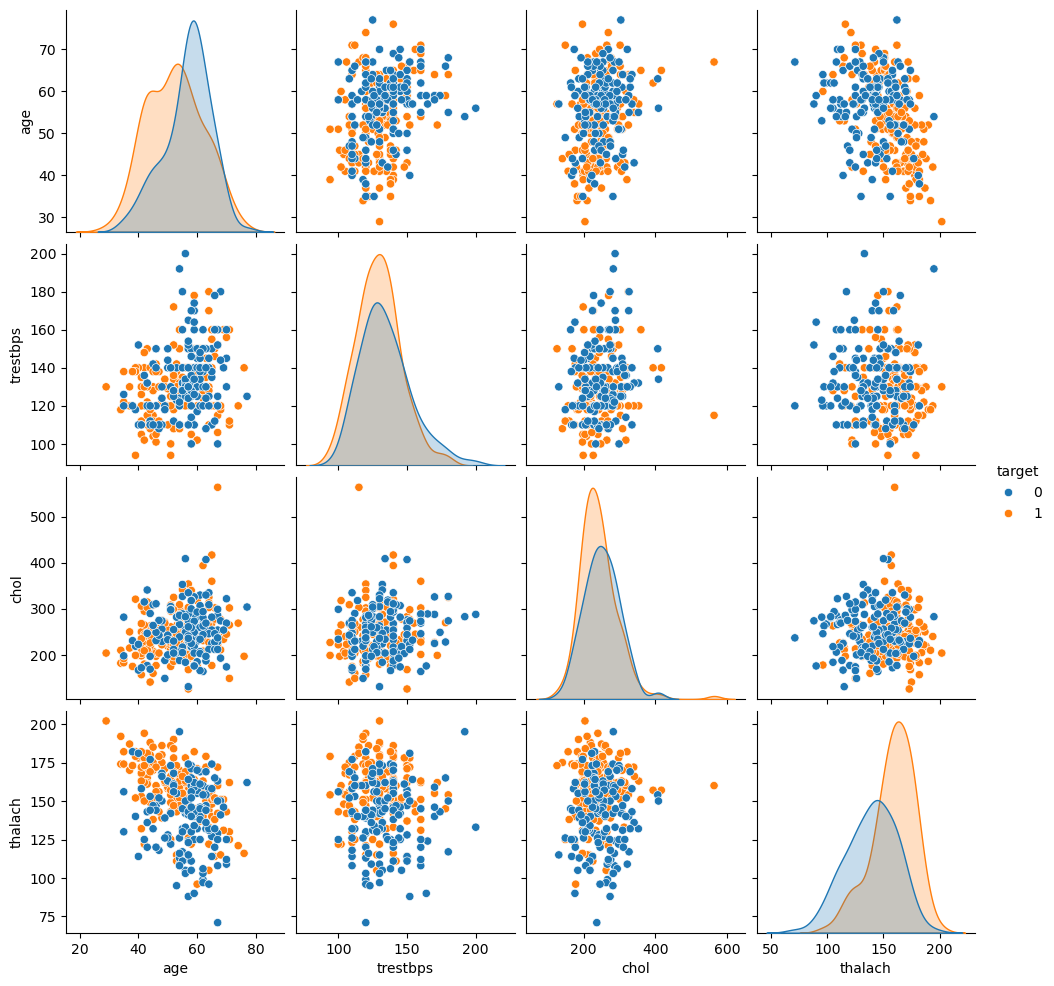

In [5]:
sel_col = ['age','trestbps', 'chol','thalach','target']
df_sel = df[sel_col]

sns.pairplot(df_sel, hue='target')
plt.show()

Классы пересекаются, а значит просто линейная модель может не справиться с классификацией.

<b> 5.Нарисуйте график heatmap (библиотека Seaborn), показывающий корреляции между всеми колонками.</b>

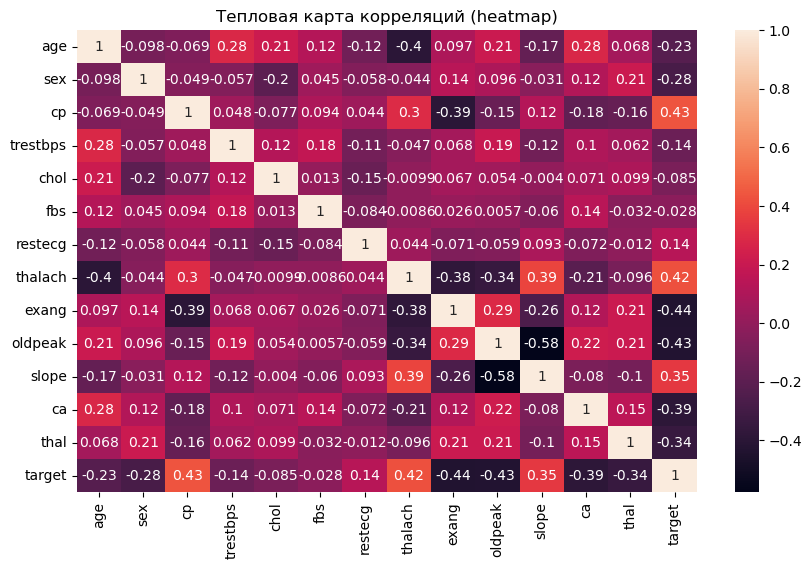

In [6]:
plt.figure(figsize=(10,6))
heatmap = sns.heatmap(df.corr(), annot=True)
plt.title('Тепловая карта корреляций (heatmap)')
plt.show()

----
----

# Машинное обучение

## Разбиение на обучающий и тестовый наборы данных, а также масштабирование данных

**6. Разделите все признаки на 2 объекта, X и y.**

In [7]:
X = df[['age',  'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']]
y = df['target'] #Целевая переменная

print('Объект X:')
print(X.head())

print('Объект y:')
print(y.head())

Объект X:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  
0   0     1  
1   0     2  
2   0     2  
3   0     2  
4   0     2  
Объект y:
0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64


**7. Разбейте данные на обучающий и тестовый наборы данных. Для тестовых данных используйте размер 10% и значение random_state=101.**

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)
print('Размер обучающего набора данных (X_train):', X_train.shape)
print('Размер тестового набора данных (X_test):', X_test.shape)
print('Размер обучающего набора данных (y_train):', y_train.shape)
print('Размер тестового набора данных (y_test):', y_test.shape)

Размер обучающего набора данных (X_train): (272, 13)
Размер тестового набора данных (X_test): (31, 13)
Размер обучающего набора данных (y_train): (272,)
Размер тестового набора данных (y_test): (31,)


**8. С помощью объекта StandardScaler нормализуйте данные признаков в обучающем и тестовом наборах данных. При дальнейшем обучении модели убедитесь, что Вы проводите обучение только на обучающем наборе данных (без утечки данных из тестового набора данных).**

Нормализация происходит по формуле: разница исходного значения и среднего значения признака, деленное на стандартное отклонение признака.

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Модель логистической регрессии

<b>9.Создайте модель логистической регрессии</b>

Лог. регрессия сначала вычисляет линейную комбинацию признаков: $$z=w_1x_1+w_2x_2+...+w_n x_n,$$ а затем $z$ передается в сигмоидную функцию $$\sigma(z)=\frac{1}{1+e^{-z}}.$$

Значение сигмоиды можно интепретировать как вероятность принадлежности объекта к классу 1.

In [10]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)

LogisticRegression()

**10. Отобразите коэффициенты модели**

In [11]:
coeffs = lr_model.coef_

print('Веса модели:')
for i, col in enumerate(X.columns):
    print(f"{col}: {round(coeffs[0][i],2)}")

Веса модели:
age: -0.07
sex: -0.73
cp: 0.89
trestbps: -0.26
chol: -0.21
fbs: 0.05
restecg: 0.12
thalach: 0.43
exang: -0.43
oldpeak: -0.53
slope: 0.38
ca: -0.85
thal: -0.57


---------

## Оценка модели

**11. Оцените работу модели на оставшихся 10% данных - тестовом наборе данных.**

**Подготовьте следующие оценки:**
* Confusion Matrix Array
* Confusion Matrix Plot
* Classification Report

Confusion matrix:
 [[12  3]
 [ 2 14]]


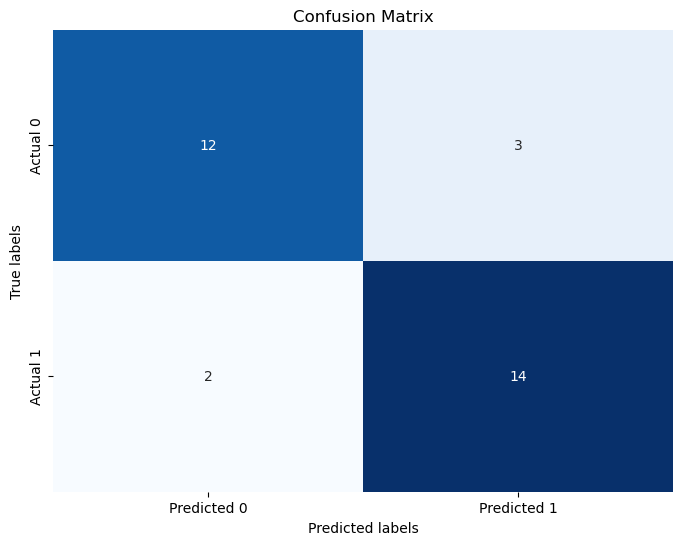

Classification report:               precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.82      0.88      0.85        16

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



In [12]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = lr_model.predict(X_test_scaled)

conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n', conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

class_report = classification_report(y_test, y_pred)
print('Classification report:', class_report)

### Кривые производительности

**12. Постройте ROC-кривую и оцените ее площадь**

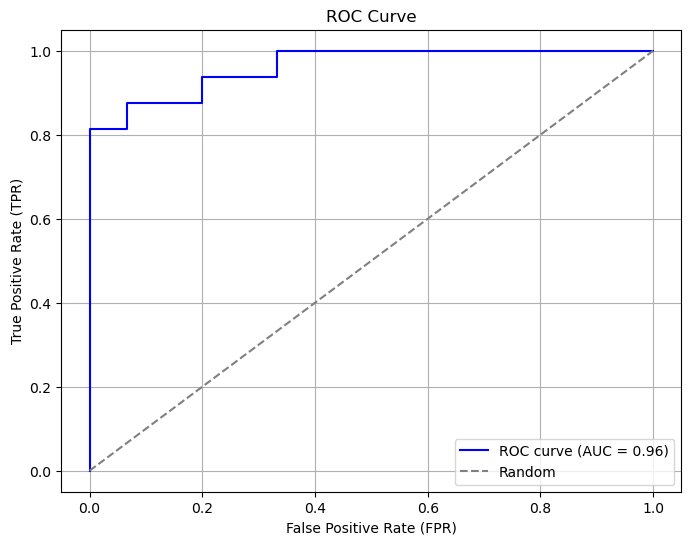

In [13]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_proba = lr_model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

Чем ближе ROC-кривая к левому краю — тем лучше производительность модели. Она показывает, как меняется чувствительность (True Positive Rate, TPR, т.е. доля правильно классифицированных положительных объектов) в зависимости от ложноположительного уровня (False Positive Rate, FPR, т.е. доля отрицательных объектов, ошибочно классифицированных как положительные) при разных значениях порога классификации. По оси x — FPR, по оси y — TPR. ROC-кривая строится путём изменения порога от 0 до 1 и отслеживания, как меняются TPR и FPR.

**13. В офис клиники пришёл пациент со следующими значениями признаков:**

    age          48.0
    sex           0.0
    cp            2.0
    trestbps    130.0
    chol        275.0
    fbs           0.0
    restecg       1.0
    thalach     139.0
    exang         0.0
    oldpeak       0.2
    slope         2.0
    ca            0.0
    thal          2.0

**Добавьте данного пациента в тестовый датасет X_test. Убедитесь, что строка добавлена. Выполните прогнозирование и определите, есть у нового пациента заболевание сердца.**

*Для Вашего удобства уже создан массив с указанными выше значениями:*

In [14]:
patient = [48.0, 0.0, 2.0, 130.0, 275.0, 0.0, 1.0, 139.0, 0.0, 0.2, 2.0, 0.0, 2.0]

print(patient)

[48.0, 0.0, 2.0, 130.0, 275.0, 0.0, 1.0, 139.0, 0.0, 0.2, 2.0, 0.0, 2.0]


In [15]:
new_patient_df = pd.DataFrame([patient], columns=['age', 'sex', 'cp', 'trestbps', 'chol', 
                                                  'fbs', 'restecg', 'thalach', 'exang', 
                                                  'oldpeak', 'slope', 'ca', 'thal'])
new_patient_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,48.0,0.0,2.0,130.0,275.0,0.0,1.0,139.0,0.0,0.2,2.0,0.0,2.0


In [16]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
221,55,1,0,140,217,0,1,111,1,5.6,0,0,3
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3
89,58,0,0,100,248,0,0,122,0,1.0,1,0,2
154,39,0,2,138,220,0,1,152,0,0.0,1,0,2
201,60,1,0,125,258,0,0,141,1,2.8,1,1,3
12,49,1,1,130,266,0,1,171,0,0.6,2,0,2
65,35,0,0,138,183,0,1,182,0,1.4,2,0,2
187,54,1,0,124,266,0,0,109,1,2.2,1,1,3
240,70,1,2,160,269,0,1,112,1,2.9,1,1,3
117,56,1,3,120,193,0,0,162,0,1.9,1,0,3


In [17]:
X_test_with_new_patient = pd.concat([X_test, new_patient_df])
X_test_with_new_patient.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
98,43.0,1.0,2.0,130.0,315.0,0.0,1.0,162.0,0.0,1.9,2.0,1.0,2.0
279,61.0,1.0,0.0,138.0,166.0,0.0,0.0,125.0,1.0,3.6,1.0,1.0,2.0
158,58.0,1.0,1.0,125.0,220.0,0.0,1.0,144.0,0.0,0.4,1.0,4.0,3.0
268,54.0,1.0,0.0,122.0,286.0,0.0,0.0,116.0,1.0,3.2,1.0,2.0,2.0
0,48.0,0.0,2.0,130.0,275.0,0.0,1.0,139.0,0.0,0.2,2.0,0.0,2.0


predict_proba() выдаст нам вероятность принадлежности объекта к одному из классов.

In [18]:
new_patient_scaled = scaler.transform(X_test_with_new_patient)
pred_prob = lr_model.predict_proba(new_patient_scaled)[:,1] # Вероятность принадлежности объекта классу 1 (то есть классу заболеваемых)

if (pred_prob >= 0.5).any(): # Если хотя бы один объект принадлежит классу 1 с вероятность больше 50%
    print('У пациента есть заболевание сердца.')
else: 
    print('У пациента нет заболевания сердца.')

У пациента есть заболевание сердца.
